In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("intraday.csv", parse_dates=["time"], index_col='time')
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


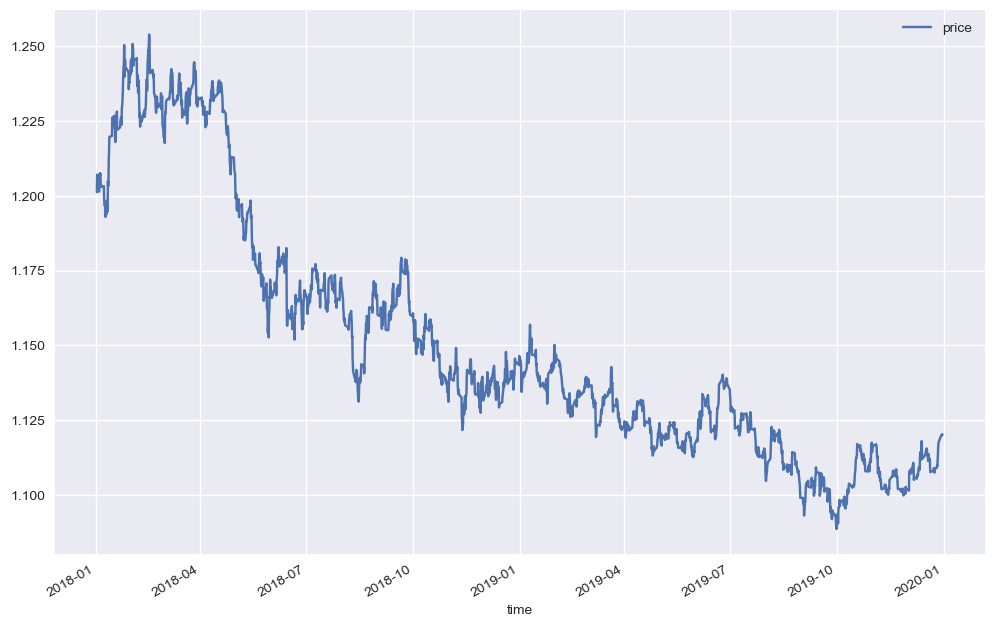

In [4]:
data.plot(figsize=(12, 8))
plt.show()

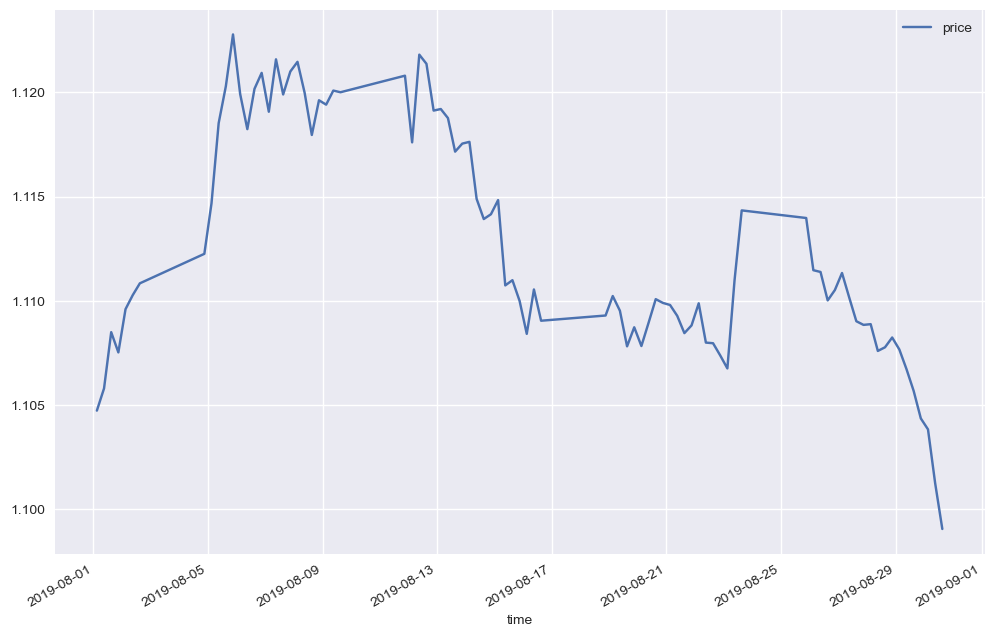

In [5]:
data.loc['2019-08'].plot(figsize=(12, 8))
plt.show()

In [6]:
data['returns'] = np.log(data.div(data.shift(1)))
data

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


### 볼린저 밴드를 이용한 평균 회귀 전략

**평균 회귀란**: 과매도, 과매수 상태이면 평균 가격으로 돌아간다는 가정
**볼린저 밴드**: SMA, 상단 밴드, 하단 밴드 개념이 있고, 상하단 밴드는 이동 편균의 표준 편차를 나타낸S

In [7]:
SMA = 30
dev = 2

In [8]:
data['SMA'] = data['price'].rolling(SMA).mean()

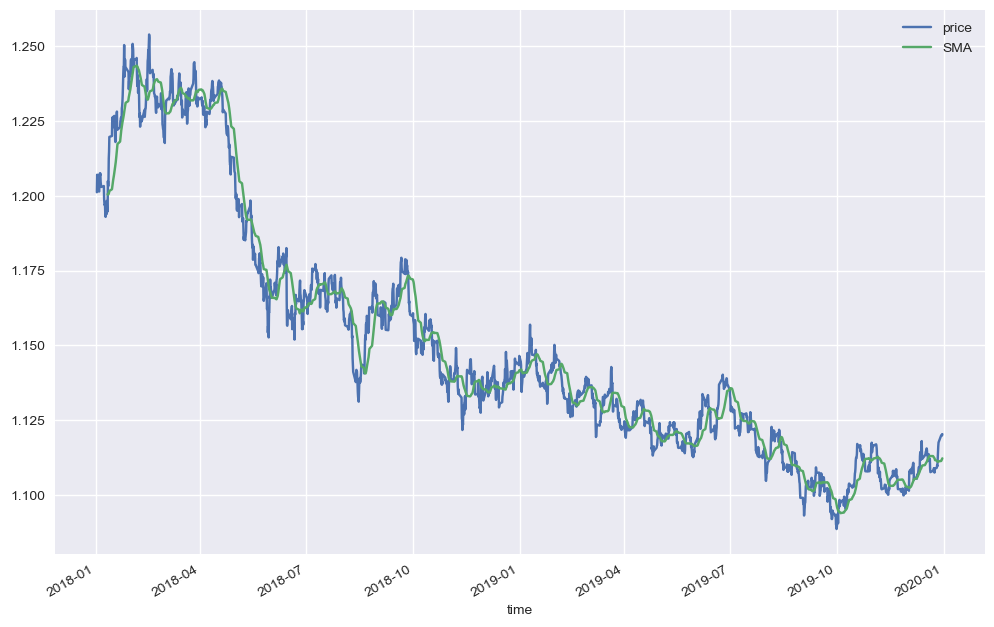

In [9]:
data[['price', 'SMA']].plot(figsize=(12, 8))
plt.show()

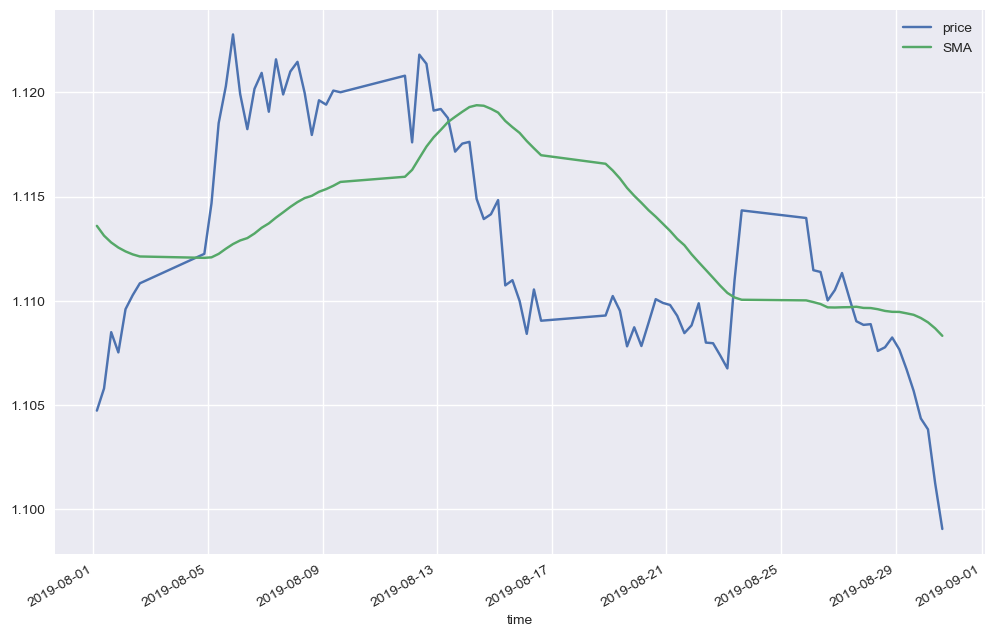

In [11]:
data.loc['2019-08', ['price', 'SMA']].plot(figsize=(12, 8))
plt.show()

In [12]:
data['price'].rolling(SMA).std()

time
2018-01-01 22:00:00+00:00         NaN
2018-01-02 04:00:00+00:00         NaN
2018-01-02 10:00:00+00:00         NaN
2018-01-02 16:00:00+00:00         NaN
2018-01-02 22:00:00+00:00         NaN
                               ...   
2019-12-29 22:00:00+00:00    0.003088
2019-12-30 04:00:00+00:00    0.003400
2019-12-30 10:00:00+00:00    0.003729
2019-12-30 16:00:00+00:00    0.004008
2019-12-30 22:00:00+00:00    0.004288
Name: price, Length: 2070, dtype: float64

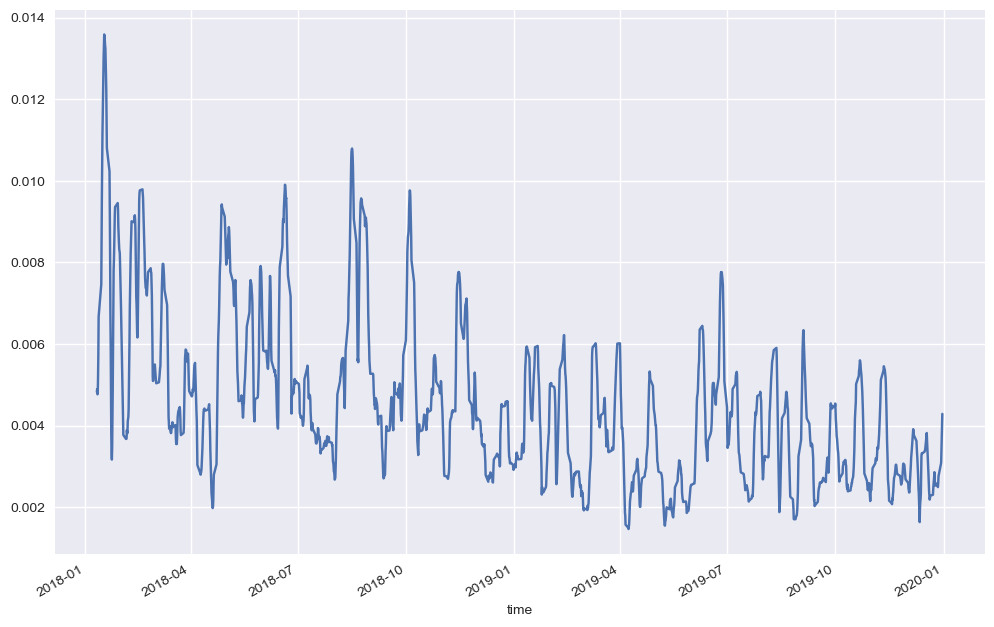

In [13]:
data['price'].rolling(SMA).std().plot(figsize=(12, 8))
plt.show()

In [14]:
data["Upper"] = data["SMA"] + data['price'].rolling(SMA).std() * dev
data["Lower"] = data["SMA"] - data['price'].rolling(SMA).std() * dev

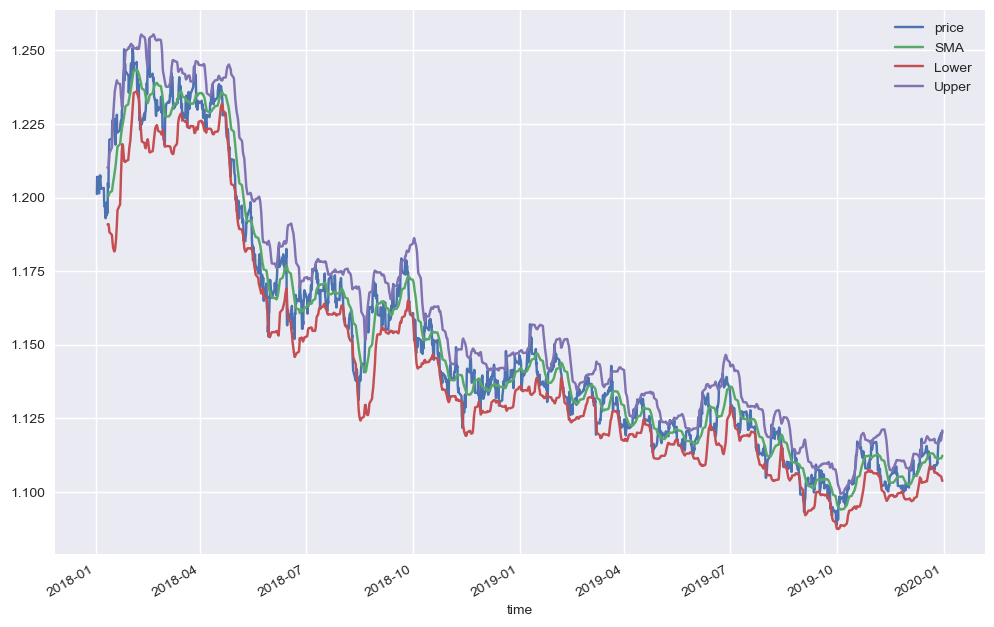

In [15]:
data.drop(columns="returns").plot(figsize=(12, 8))
plt.show()

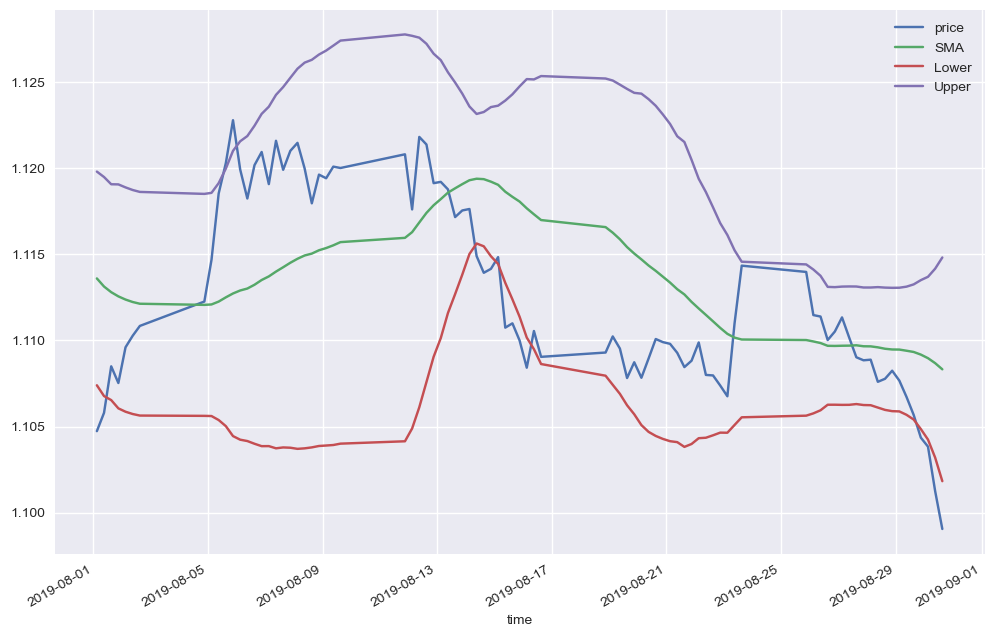

In [17]:
data.drop(columns="returns").loc['2019-08'].plot(figsize=(12, 8))
plt.show()

In [18]:
data.dropna(inplace=True)

In [19]:
data

,price,returns,SMA,Lower,Upper
time,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122
...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235


In [20]:
data['distance'] = data.price - data.SMA
data

,price,returns,SMA,Lower,Upper,distance
time,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318


In [21]:
data['position'] = np.where(data.price < data.Lower, 1, np.nan)

In [22]:
data['position'] = np.where(data.price > data.Upper, -1, data['position'])

In [23]:
data

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,NaN
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,NaN
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,NaN
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0


In [24]:
data['position'] = np.where(data.distance * data.distance.shift(1) < 0, 0, data['position'])

In [25]:
data

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,NaN
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,NaN
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0


In [29]:
data.position = data.position.ffill().fillna(0)

In [30]:
data

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,0.0
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2041 entries, 2018-01-11 04:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2041 non-null   float64
 1   returns   2041 non-null   float64
 2   SMA       2041 non-null   float64
 3   Lower     2041 non-null   float64
 4   Upper     2041 non-null   float64
 5   distance  2041 non-null   float64
 6   position  2041 non-null   float64
dtypes: float64(7)
memory usage: 127.6 KB


In [32]:
data.position.value_counts()

 0.0    919
 1.0    596
-1.0    526
Name: position, dtype: int64

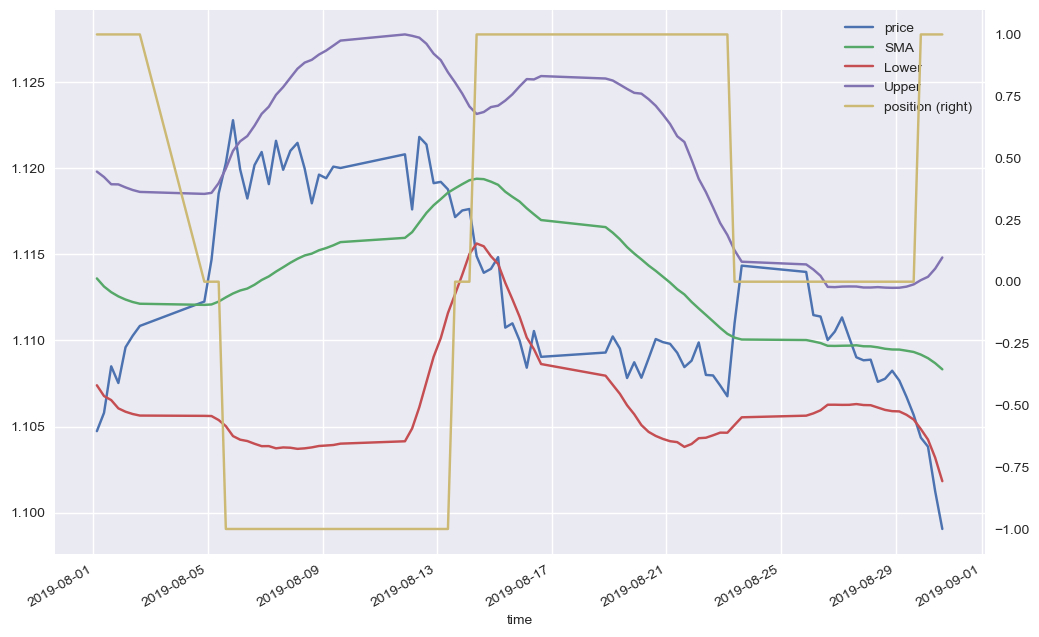

In [33]:
data.drop(columns=['returns', 'distance']).loc['2019-08'].plot(figsize=(12, 8), secondary_y='position')
plt.show()

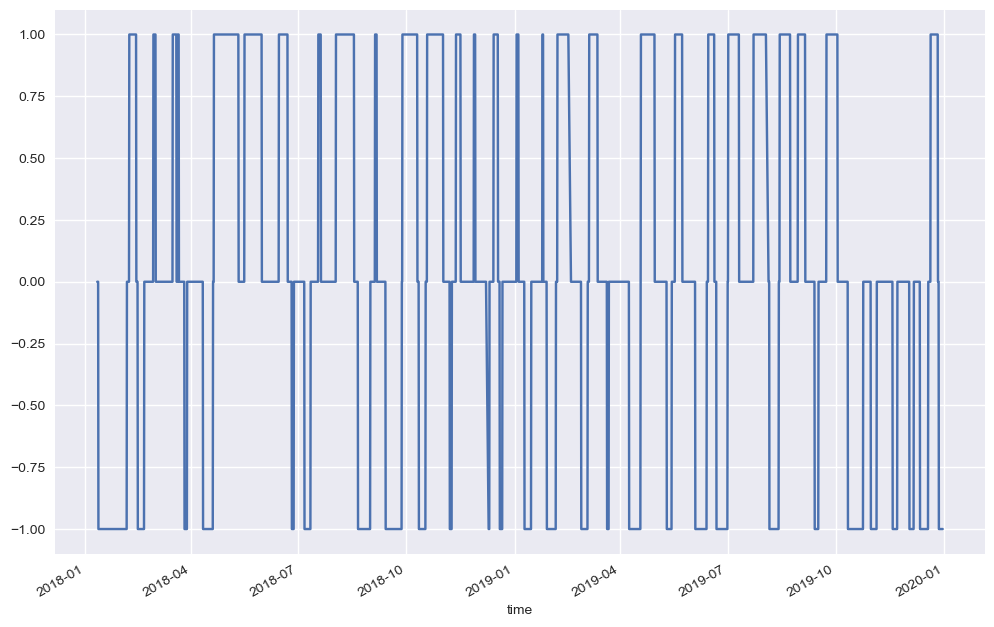

In [34]:
data.position.plot(figsize=(12, 8))
plt.show()

### 벡터화 전략 백테스팅

In [35]:
data['strategy'] = data.position.shift(1) * data['returns']

In [36]:
data.dropna(inplace=True)

In [37]:
data['creturns'] = data['returns'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

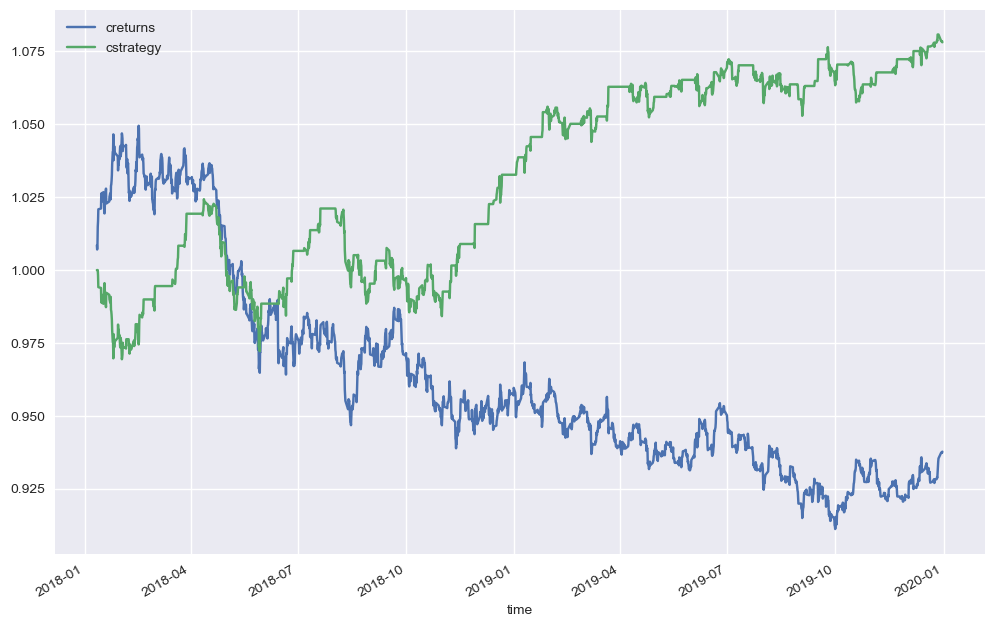

In [38]:
data[['creturns', 'cstrategy']].plot(figsize=(12, 8))
plt.show()

In [39]:
ptc = 0.00007

In [40]:
data['trades'] = data.position.diff().fillna(0).abs()

In [41]:
data.trades.value_counts()

0.0    1929
1.0     111
Name: trades, dtype: int64

In [42]:
data['strategy_net'] = data.strategy - data.trades * ptc

In [43]:
data['cstrategy_net'] = data.strategy_net.cumsum().apply(np.exp)

In [44]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
time,,,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,1.008491,1.000000,0.0,0.000000,1.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,1.007060,1.000000,0.0,-0.000000,1.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,1.008700,1.000000,0.0,0.000000,1.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000,1.014865,1.000000,1.0,-0.000070,0.999930
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,1.016781,0.998115,0.0,-0.001887,0.998045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555,0.0,-0.002092,1.070207
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536,0.0,-0.000018,1.070188
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387,0.0,-0.000138,1.070040


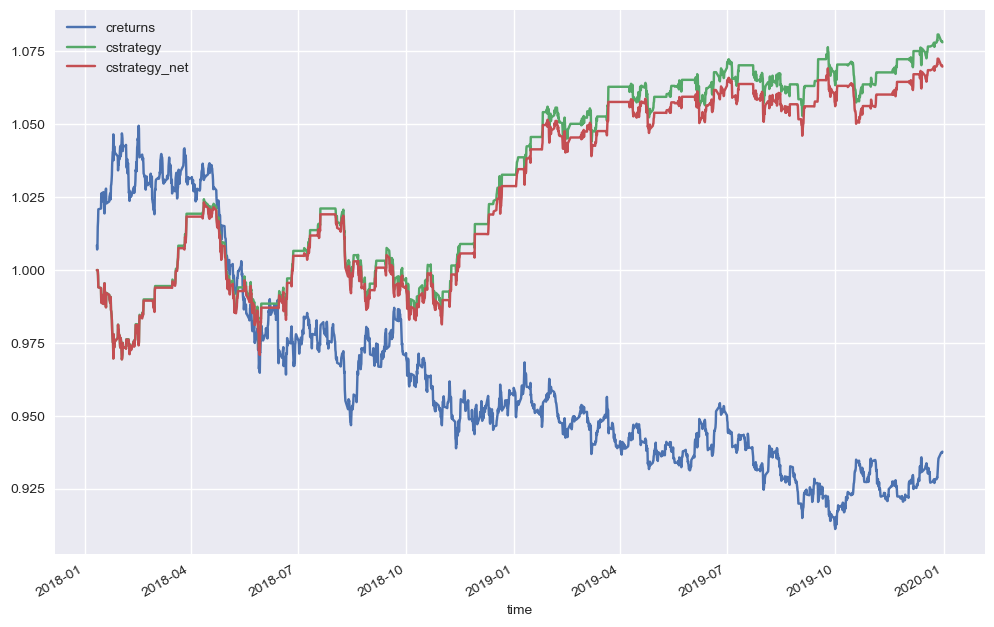

In [45]:
data[['creturns', 'cstrategy', 'cstrategy_net']].plot(figsize=(12, 8))
plt.show()

In [46]:
data[['returns', 'strategy_net']].mean() * (4 * 252)

returns        -0.031776
strategy_net    0.033335
dtype: float64

In [47]:
data[['returns', 'strategy_net']].std() * np.sqrt(4 * 252)

returns         0.059975
strategy_net    0.044624
dtype: float64

### 볼린저밴드 백테스팅 클래스 사용

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
from scipy.optimize import brute
from BBBacktester import BBBacktester as BB

In [49]:
pd.read_csv("intraday_pairs.csv", parse_dates=["time"], index_col="time")

,EURUSD,GBPUSD,EURAUD
time,,,
2018-01-01 22:00:00+00:00,1.201205,1.351705,1.533390
2018-01-02 04:00:00+00:00,1.207055,1.354830,1.540480
2018-01-02 10:00:00+00:00,1.204440,1.357860,1.537980
2018-01-02 16:00:00+00:00,1.205800,1.359180,1.540185
2018-01-02 22:00:00+00:00,1.204690,1.359530,1.542225
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,1.311810,1.602420
2019-12-30 04:00:00+00:00,1.119940,1.311880,1.600800
2019-12-30 10:00:00+00:00,1.120095,1.311465,1.601165


In [50]:
ptc = 0.00007

### EURUSD

In [51]:
tester = BB("EURUSD", 30, 2, '2018-01-01', '2019-12-31', ptc)
tester

BBBacktester(symbol = EURUSD, SMA = 30, dev = 2, start = 2018-01-01, end = 2019-12-31)

In [52]:
tester.test_strategy()

(1.069792, 0.132076)

In [53]:
tester.results

,price,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,0.0,1.008491,1.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,0.0,1.007060,1.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,0.0,1.008700,1.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,-0.000070,1.0,1.014865,0.999930
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,0.0,1.016781,0.998045
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.0,0.937352,1.070207
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.0,0.937369,1.070188
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.0,0.937498,1.070040


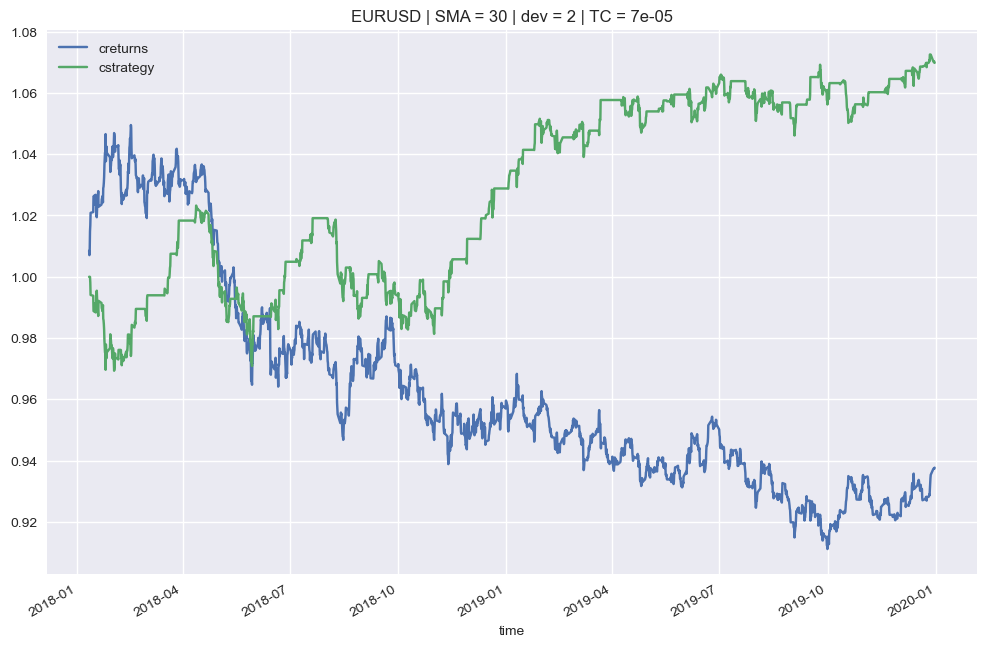

In [54]:
tester.plot_results()

In [55]:
tester.optimize_parameters((25, 100, 1), (1, 5, 1))

(array([58.,  1.]), 1.238111)

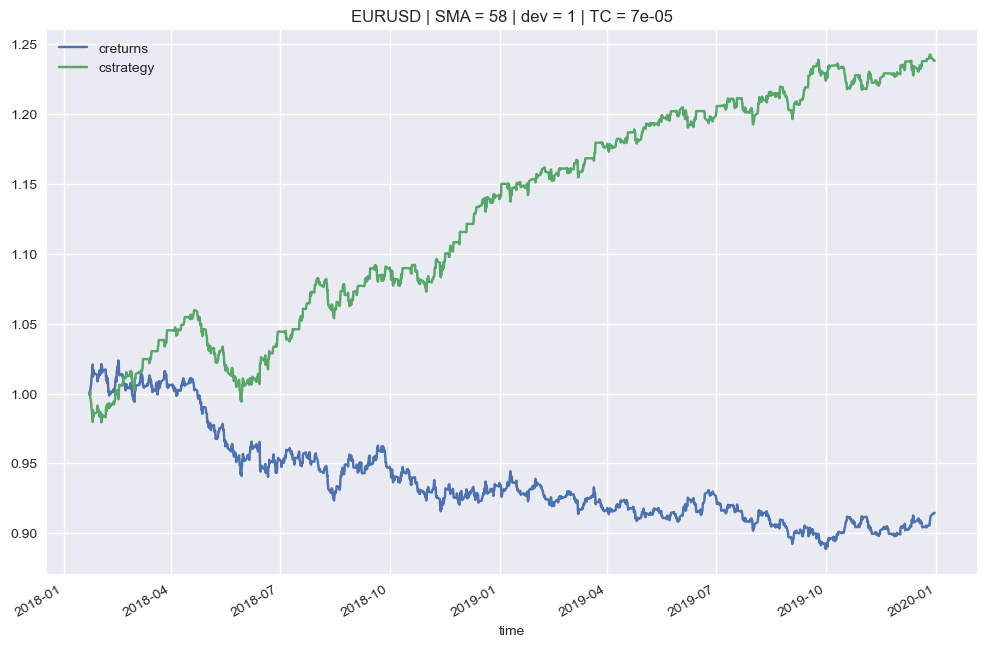

In [56]:
tester.plot_results()

In [57]:
tester.results

,price,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,0.014622,-1.0,-0.000343,0.0,1.000343,0.999657
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,0.015058,-1.0,-0.000624,0.0,1.000967,0.999034
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,0.014335,-1.0,0.000290,0.0,1.000678,0.999323
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,0.012010,-1.0,0.001645,0.0,0.999033,1.000968
2018-01-23 10:00:00+00:00,1.229295,0.004509,1.212179,1.199743,1.224614,0.017116,-1.0,-0.004509,0.0,1.003547,0.996465
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718,0.008570,-1.0,-0.002092,0.0,0.914258,1.238592
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065,0.008349,-1.0,-0.000018,0.0,0.914274,1.238569
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395,0.008252,-1.0,-0.000138,0.0,0.914401,1.238398


### GBPUSD

In [58]:
tester = BB("GBPUSD", 30, 2, '2018-01-01', '2019-12-31', ptc)
tester

BBBacktester(symbol = GBPUSD, SMA = 30, dev = 2, start = 2018-01-01, end = 2019-12-31)

In [59]:
tester.test_strategy()

(0.996769, 0.023527)

In [60]:
tester.optimize_parameters((25, 100, 1), (1, 5, 1))

(array([79.,  1.]), 1.171116)

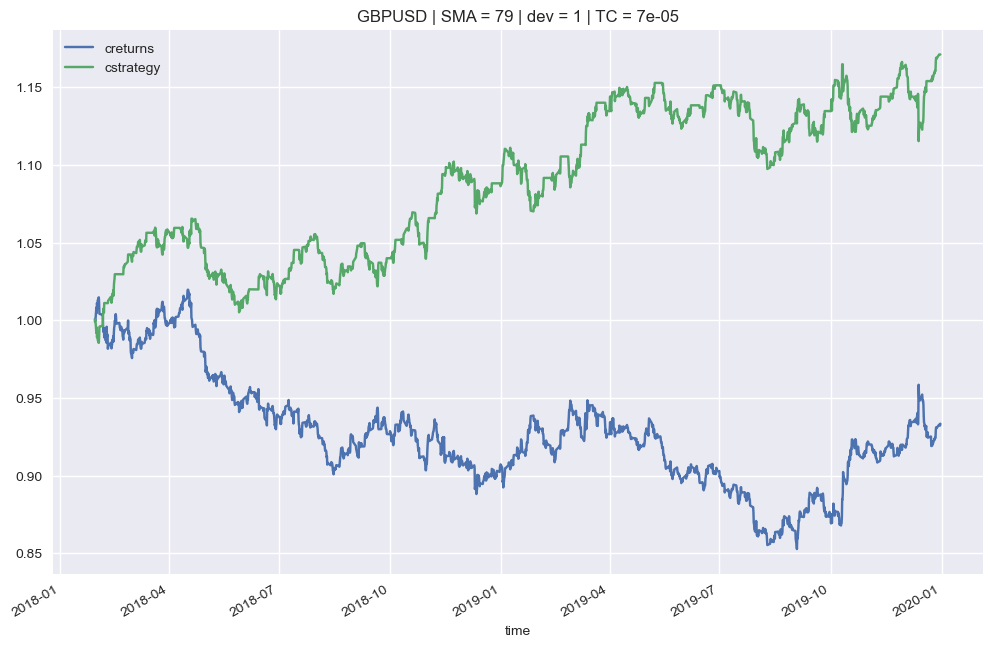

In [61]:
tester.plot_results()